In [1]:
from copy import deepcopy

import ARESlatticeStage3v1_9 as ares
import cheetah
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import ocelot as oc
import scienceplots
import torch
from ocelot.adaptors import astraBeam2particleArray, particleArray2astraBeam

[INFO    ] csr.py: module PYFFTW is not installed. Install it to speed up calculation.


initializing ocelot...
import: module PYFFTW is not installed. Install it to speed up calculation


In [2]:
# Load ASTRA no sc result
astra_outbeam_nosc = cheetah.ParticleBeam.from_astra(
    "ares_ea_no_sc.0205.001", device="cpu"
)

In [3]:
ares_ea_lattice = [
    oc.Drift(l=0.1750 - 0.061),
    oc.Quadrupole(l=0.122, k1=5.0, eid="Q1"),  # Centered at 0.1750
    oc.Drift(l=0.4280),
    oc.Quadrupole(l=0.122, k1=-10.0, eid="Q2"),  # Centered at 0.7250
    oc.Drift(l=0.4280),
    oc.Quadrupole(l=0.122, k1=5.0, eid="Q3"),  # Centered at 1.2750
    oc.Drift(l=0.71),
    oc.Marker(),
]


lattice = oc.MagneticLattice(ares_ea_lattice)
# p_array = astraBeam2particleArray("ACHIP_EA1_2021.1351.001")
p_array = astraBeam2particleArray("test_smallbeam.001")

navi = oc.Navigator(lattice)
# navi.unit_step = lattice.totalLen
_, p_array_out = oc.track(lattice, deepcopy(p_array), navi, print_progress=False)

ocelot_outbeam_nosc = cheetah.ParticleBeam.from_ocelot(p_array_out)

Astra to Ocelot: charge =  5.0000000000007985e-14  C
Astra to Ocelot: particles number =  10000
Astra to Ocelot: energy =  0.10731590244355117  GeV
Astra to Ocelot: s pos =  0.0  m


In [4]:
#
segment = cheetah.Segment.from_ocelot(ares_ea_lattice, warnings=False)

# particle_beam = cheetah.ParticleBeam.from_astra("ACHIP_EA1_2021.1351.001", device="cpu")
particle_beam = cheetah.ParticleBeam.from_astra("test_smallbeam.001", device="cpu")
cheetah_outbeam = segment.track(particle_beam)

In [5]:
segment

Segment(elements=ModuleList(
  (0): Drift(length=tensor(0.1140), tracking_method='cheetah', name='ID_56241702_')
  (1): Quadrupole(length=tensor(0.1220), k1=tensor(5.), misalignment=tensor([0., 0.]), tilt=tensor(0.), num_steps=1, tracking_method='cheetah', name='Q1')
  (2): Drift(length=tensor(0.4280), tracking_method='cheetah', name='ID_5908145_')
  (3): Quadrupole(length=tensor(0.1220), k1=tensor(-10.), misalignment=tensor([0., 0.]), tilt=tensor(0.), num_steps=1, tracking_method='cheetah', name='Q2')
  (4): Drift(length=tensor(0.4280), tracking_method='cheetah', name='ID_72551548_')
  (5): Quadrupole(length=tensor(0.1220), k1=tensor(5.), misalignment=tensor([0., 0.]), tilt=tensor(0.), num_steps=1, tracking_method='cheetah', name='Q3')
  (6): Drift(length=tensor(0.7100), tracking_method='cheetah', name='ID_49024323_')
  (7): Marker(name='ID_19676894_')
), name='unnamed_element_0')

In [6]:
# astra_outbeam_nosc = cheetah.ParticleBeam.from_astra("../astra/ares_ea_no_sc.0205.001", device="cpu")
astra_outbeam_nosc = cheetah.ParticleBeam.from_astra(
    "ares_ea_no_sc.0205.001", device="cpu"
)

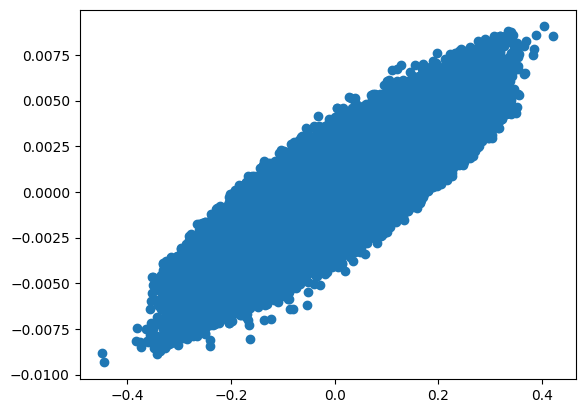

In [7]:
plt.scatter(particle_beam.x * 1e3, particle_beam.px * 1e3)

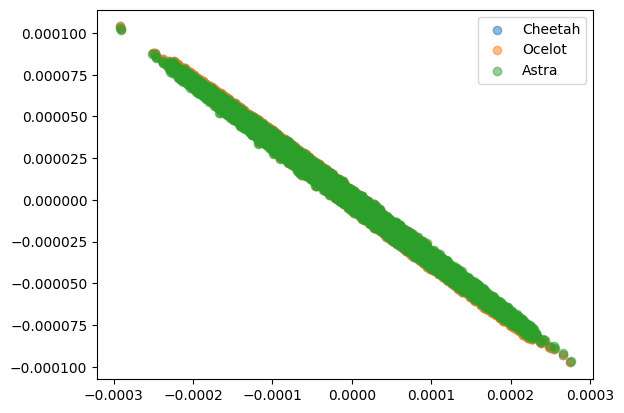

In [8]:
plt.scatter(cheetah_outbeam.x, cheetah_outbeam.px, alpha=0.5, label="Cheetah")

plt.scatter(ocelot_outbeam_nosc.x, ocelot_outbeam_nosc.px, alpha=0.5, label="Ocelot")
plt.scatter(astra_outbeam_nosc.x, astra_outbeam_nosc.px, alpha=0.5, label="Astra")
plt.legend()

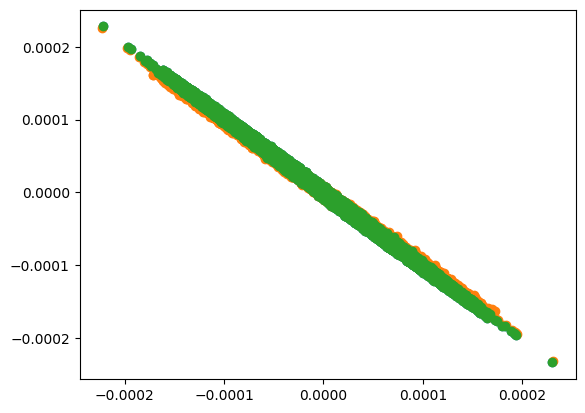

In [9]:
plt.scatter(cheetah_outbeam.y, cheetah_outbeam.py)
plt.scatter(astra_outbeam_nosc.y, astra_outbeam_nosc.py)
plt.scatter(ocelot_outbeam_nosc.y, ocelot_outbeam_nosc.py)
# plt.scatter(astra_outbeam_nosc.y, astra_outbeam_nosc.py)

## Look at stranger beam distribution


In [10]:
parray_in = astraBeam2particleArray("ACHIP_EA1_2021.1351.001").thin_out(2)
# Generate some weird pattern
# invert the sign of x for every other particle
parray_in.rparticles[0, ::2] *= -1
parray_in.q_array = np.ones_like(parray_in.q_array) * 5e-12 / len(parray_in.q_array)
# Set long position to 0.0
parray_in.s = 0.0

Astra to Ocelot: charge =  5.000000000001694e-13  C
Astra to Ocelot: particles number =  100000
Astra to Ocelot: energy =  0.10731590244355117  GeV
Astra to Ocelot: s pos =  13.50890653269  m


In [11]:
# Save to astra file
# particleArray2astraBeam(parray_in, "interesting_initial_beam.001")

In [12]:
# os.system("./Astra ares_ea_fun_beam.in")  # Run Astra simulation
# os.system("./Astra ares_ea_fun_beam_nosc.in")  # Run Astra simulation with no space charge
astra_outbeam = cheetah.ParticleBeam.from_astra(
    "ares_ea_fun_beam.0205.001", device="cpu"
)
astra_outbeam_nosc = cheetah.ParticleBeam.from_astra(
    "ares_ea_fun_beam_nosc.0205.001", device="cpu"
)

In [13]:
parray_in = astraBeam2particleArray("interesting_initial_beam.001")

Astra to Ocelot: charge =  5.000000000004141e-12  C
Astra to Ocelot: particles number =  50000
Astra to Ocelot: energy =  0.10731590244355117  GeV
Astra to Ocelot: s pos =  0.0  m


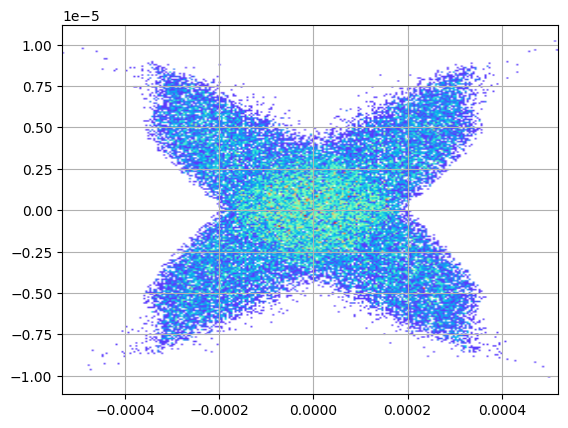

In [14]:
from ocelot.gui.accelerator import show_density

show_density(parray_in.x(), parray_in.px())

In [15]:
cheetah_inbeam = cheetah.ParticleBeam.from_ocelot(parray_in)

cheetah_outbeam = segment.track(cheetah_inbeam)

In [16]:
# navi = oc.Navigator(lattice)
# # navi.unit_step = lattice.totalLen
# _, p_array_out = oc.track(lattice, deepcopy(parray_in), navi, print_progress=False)

# ocelot_outbeam_nosc = cheetah.ParticleBeam.from_ocelot(p_array_out)

In [17]:
# navi = oc.Navigator(lattice)
# sc = oc.SpaceCharge()
# navi.add_physics_proc(sc, lattice.sequence[0], lattice.sequence[-1])
# # navi.unit_step = lattice.totalLen
# _, p_array_out_sc = oc.track(lattice, deepcopy(parray_in), navi, print_progress=False)

# ocelot_outbeam_sc = cheetah.ParticleBeam.from_ocelot(p_array_out_sc)

In [18]:
# plt.scatter(ocelot_outbeam_sc.xs, ocelot_outbeam_sc.xps,alpha=0.5, label="Ocelot with sc")
# plt.scatter(ocelot_outbeam_nosc.xs, ocelot_outbeam_nosc.xps,alpha=0.3, label="Ocelot no sc")
# plt.scatter(cheetah_outbeam.xs, cheetah_outbeam.xps, alpha=0.3, label="Cheetah")
# plt.scatter(astra_outbeam.xs, astra_outbeam.xps,alpha=0.3, label="Astra")
# plt.legend()
# plt.title("Tracking result 10 pC bunch")

### Final Plot


In [19]:
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
plt.style.use(["science", "ieee", "no-latex"])

my_cmap = matplotlib.colormaps.get_cmap("viridis")
my_cmap.set_under("white")

In [20]:
def create_histogram(beam, bins=100):
    H, xedges, yedges = np.histogram2d(beam.x * 1e3, beam.px * 1e3, bins=bins)
    return H.T, xedges, yedges

In [21]:
beams = [cheetah_inbeam, astra_outbeam_nosc, astra_outbeam, cheetah_outbeam]

Hs = []
xedges = []
yedges = []
for beam in beams:
    H, x, y = create_histogram(beam)
    Hs.append(H)
    xedges.append(x)
    yedges.append(y)

vmin = np.min(Hs) + (np.max(Hs) - np.min(Hs)) * 0.0001
vmax = np.max(Hs)

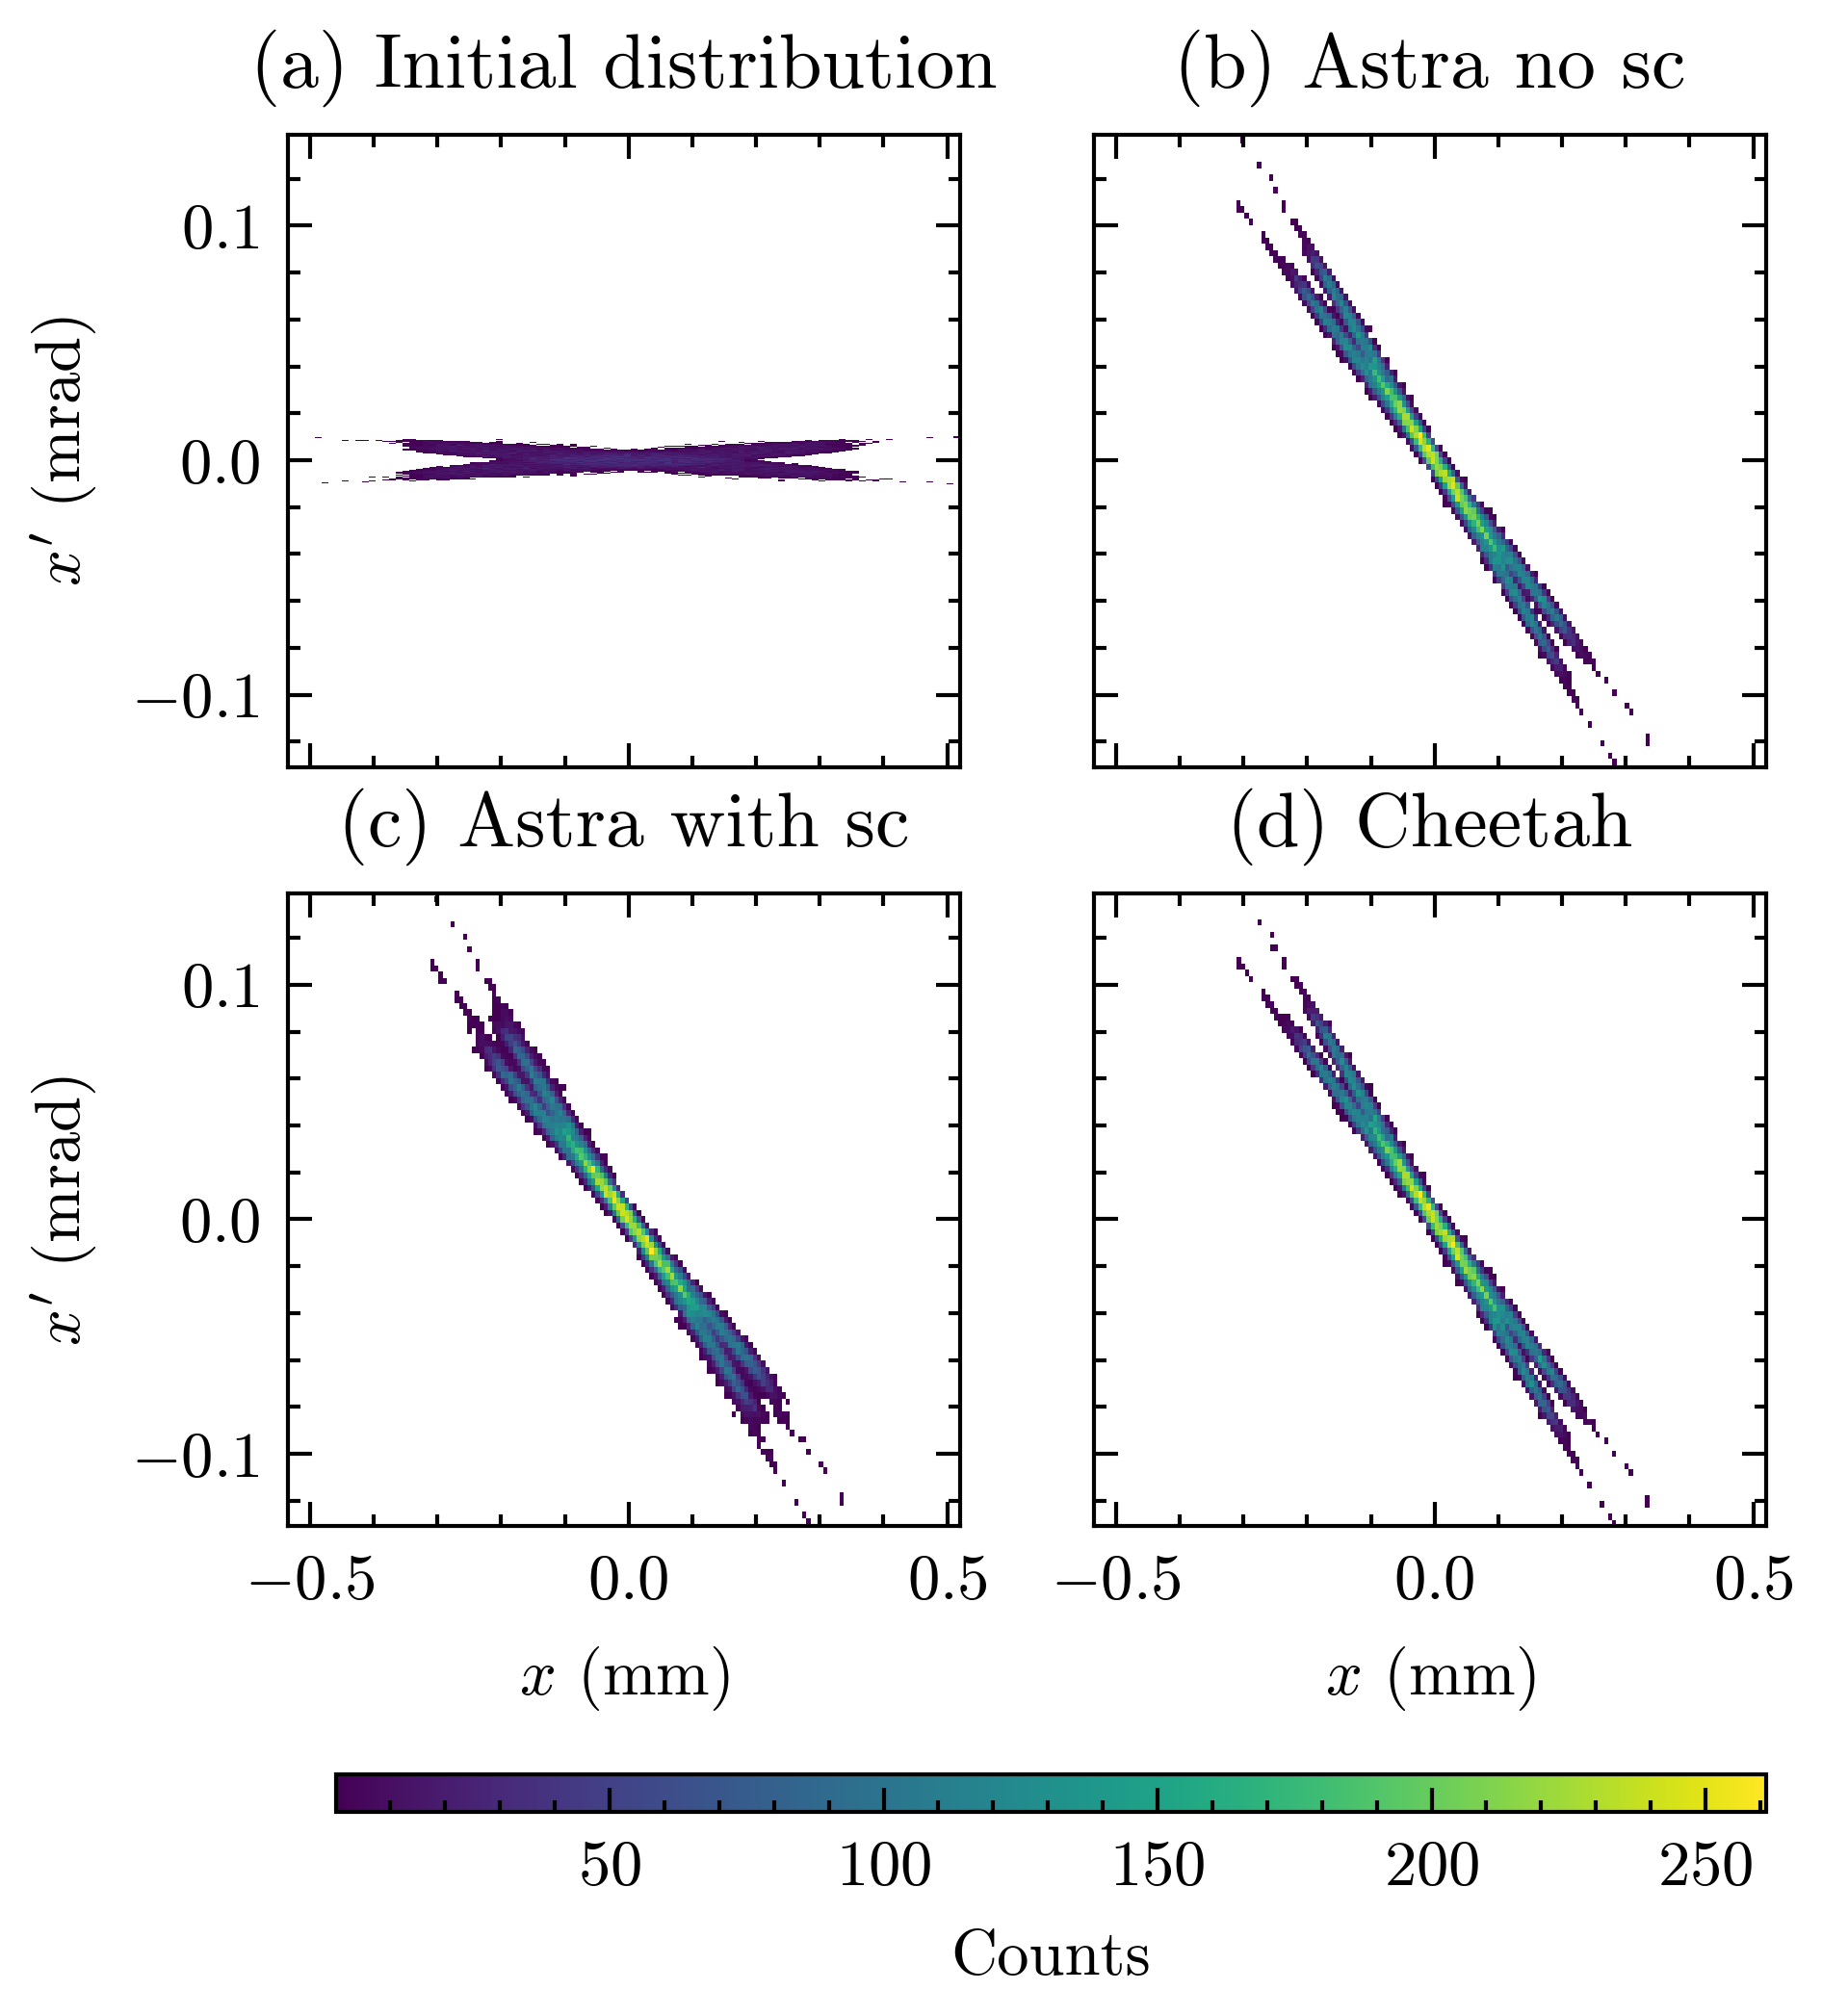

In [22]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(3.3, 3.3))
fig.subplots_adjust(bottom=0.15)
# Set label font size
for ax in axes.flatten():
    ax.tick_params(labelsize=8)

for i, ax in enumerate(axes.flatten()):
    im = ax.pcolormesh(xedges[i], yedges[i], Hs[i], cmap=my_cmap, vmin=vmin, vmax=vmax)
    ax.set_title(
        [
            "(a) Initial distribution",
            "(b) Astra no sc",
            "(c) Astra with sc",
            "(d) Cheetah",
        ][i]
    )

# Set axis labels
axes[0, 0].set_ylabel("$x'$ (mrad)", fontsize=8)
axes[1, 0].set_ylabel("$x'$ (mrad)", fontsize=8)
axes[1, 0].set_xlabel("$x$ (mm)", fontsize=8)
axes[1, 1].set_xlabel("$x$ (mm)", fontsize=8)
# Set font size

# create a colorbar horizontal at the bottom
cbar_ax = fig.add_axes([0.15, 0.0, 0.75, 0.02])
cbar_ax.tick_params(labelsize=8)
# Make the colorbar thinner
cbar = fig.colorbar(im, cax=cbar_ax, orientation="horizontal", shrink=0.15)
cbar.set_label("Counts", fontsize=8)
# cbar = fig.colorbar(im, cax=cbar_ax, orientation="horizontal", shrink=0.5)
fig.savefig("phase_space_comparison.pdf", bbox_inches="tight")

In [23]:
# Calculate the relative error
rel_error_x = (cheetah_outbeam.sigma_x - astra_outbeam.sigma_x) / astra_outbeam.sigma_x
rel_error_xp = (
    cheetah_outbeam.sigma_px - astra_outbeam.sigma_px
) / astra_outbeam.sigma_px
print(f"Relative error in x: {rel_error_x * 100:.2f}%")
print(f"Relative error in xp: {rel_error_xp * 100:.2f}%")

Relative error in x: -2.88%
Relative error in xp: 7.49%


In [24]:
# Calculate the relative error without sc
rel_error_x = (
    cheetah_outbeam.sigma_x - astra_outbeam_nosc.sigma_x
) / astra_outbeam_nosc.sigma_x
rel_error_xp = (
    cheetah_outbeam.sigma_px - astra_outbeam_nosc.sigma_px
) / astra_outbeam_nosc.sigma_px
print(f"Relative error in x: {rel_error_x * 100:.2f}%")
print(f"Relative error in xp: {rel_error_xp * 100:.2f}%")

Relative error in x: -0.63%
Relative error in xp: 0.95%
